In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('sample.csv')

In [3]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515


Here, CRSDepTime, CRSArrTime, DepTime, and ArrTime represent the scheduled time of departure, the scheduled time of arrival, the actual time of departure, and the actual time of arrival respectively. Origin and Dest are the Origin and Destination of the journey.

There are two ways in which we can define a path as the shortest:
a) By distance
b) By air time

We can convert the problem to a graph by representing all the airports as vertices, and the route between them as edges.

In [4]:
from networkx import convert_matrix as cm

In [5]:
df = cm.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True)

In [6]:
df.edges()

EdgeView([('GEG', 'LAS'), ('SAT', 'LAX'), ('SAT', 'LAS'), ('JAX', 'ORF'), ('JAX', 'TPA'), ('JAX', 'BNA'), ('JAX', 'BWI'), ('JAX', 'HOU'), ('JAX', 'FLL'), ('JAX', 'PHL'), ('JAX', 'BHM'), ('JAX', 'IND'), ('SNA', 'LAS'), ('IAD', 'TPA'), ('IAD', 'LAS'), ('BWI', 'MCI'), ('BWI', 'LIT'), ('BWI', 'ISP'), ('BWI', 'LAS'), ('BWI', 'IND'), ('BWI', 'JAN'), ('TUL', 'LAS'), ('LBB', 'LAS'), ('LBB', 'AUS'), ('LBB', 'DAL'), ('LBB', 'ELP'), ('LBB', 'ABQ'), ('PHL', 'LAS'), ('OMA', 'LAS'), ('MCI', 'BNA'), ('MCI', 'DAL'), ('MCI', 'DEN'), ('MCI', 'LAX'), ('MCI', 'MCO'), ('MCI', 'LAS'), ('MCI', 'MDW'), ('MCI', 'IND'), ('MCI', 'ABQ'), ('OAK', 'LAX'), ('OAK', 'LAS'), ('MCO', 'ISP'), ('MCO', 'LAS'), ('MCO', 'IND'), ('MCO', 'JAN'), ('CMH', 'LAS'), ('ALB', 'LAS'), ('PHX', 'LAX'), ('PHX', 'LAS'), ('PHX', 'IND'), ('PHX', 'LIT'), ('SDF', 'LAS'), ('TUS', 'LAX'), ('TUS', 'LAS'), ('SLC', 'LAX'), ('SLC', 'LAS'), ('DEN', 'LAS'), ('BDL', 'LAS'), ('LAX', 'SJC'), ('LAX', 'BNA'), ('LAX', 'SMF'), ('LAX', 'SFO'), ('LAX', 'RNO')

In [7]:
df.nodes()

NodeView(('GEG', 'SAT', 'JAX', 'SNA', 'IAD', 'BWI', 'TUL', 'LBB', 'PHL', 'OMA', 'MCI', 'OAK', 'MCO', 'CMH', 'ALB', 'PHX', 'SDF', 'TUS', 'SLC', 'DEN', 'BDL', 'LAX', 'MHT', 'STL', 'SEA', 'HOU', 'IND', 'ORF', 'CLE', 'BHM', 'AMA', 'DAL', 'BOI', 'LIT', 'ISP', 'PIT', 'RNO', 'AUS', 'MSY', 'JAN', 'RDU', 'SMF', 'BUR', 'BUF', 'PVD', 'TPA', 'BNA', 'PBI', 'FLL', 'OKC', 'MAF', 'RSW', 'ONT', 'PDX', 'SJC', 'SFO', 'LAS', 'MDW', 'SAN', 'ELP', 'ABQ'))

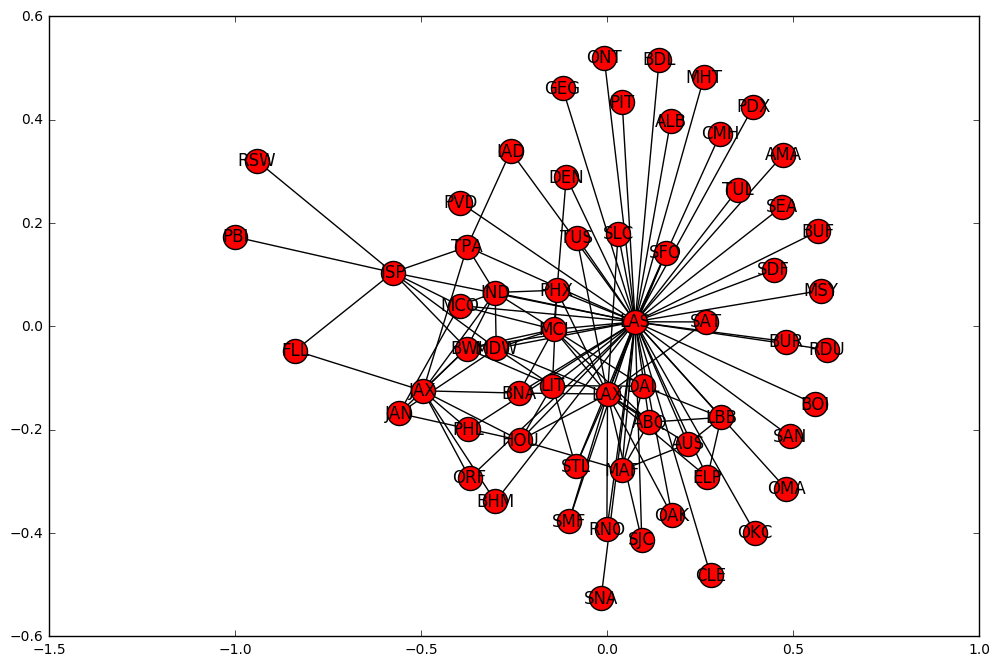

In [9]:
#Draw vizualization
import matplotlib.pyplot as plt
import networkx as nx
% matplotlib inline

plt.figure(figsize = (12,8))
nx.draw_networkx(df, with_labels = True)

In [11]:
#finding shortest path distance
shortest_path_distance = nx.dijkstra_path(df, source = 'AMA', target = 'PBI', weight = 'Distance')
shortest_path_distance

['AMA', 'LAS', 'ISP', 'PBI']

In [12]:
#finding shortest airtime path
shortest_path_airtime = nx.dijkstra_path(df, source = 'AMA', target = 'PBI', weight = 'AirTime')
shortest_path_airtime

['AMA', 'LAS', 'ISP', 'PBI']